In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import layers , Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import cv2
from cv2 import imread , imshow , imwrite
from google.colab.patches import cv2_imshow as imshow

In [2]:
data = keras.datasets.cifar10.load_data()

In [3]:
type(data[1][1])

numpy.ndarray

In [4]:
(X_train ,y_train ), (X_test , y_test) = data

In [5]:
X_train.shape ,y_train.shape , X_test.shape , y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)

In [8]:
y_train.shape

(50000,)

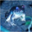

In [9]:
imshow(X_train[0])

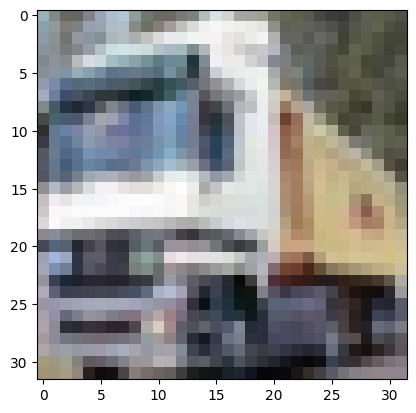

In [10]:
plt.imshow(X_train[1])

In [11]:
classes = ['airlane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [12]:
def dis_img(X , y , index):
  plt.figure(figsize=(4,4))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

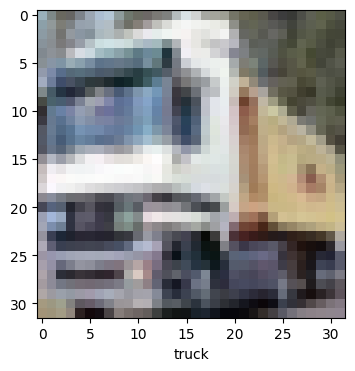

In [13]:
dis_img(X_train,y_train,1)

In [14]:
X_train = X_train/255
X_test = X_test/255

In [15]:
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(500 , activation = 'relu'),
    keras.layers.Dense(100 , activation = 'sigmoid'),
    keras.layers.Dense(10 , activation = 'softmax')
      ])

In [16]:
ann_model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
              )

In [17]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 500)               1536500   
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 1587610 (6.06 MB)
Trainable params: 1587610 (6.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
ann_model.fit(X_train , y_train , epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 34s 21ms/step - loss: 1.8644 - accuracy: 0.3227
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.6580 - accuracy: 0.4046
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.5676 - accuracy: 0.4389
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.5134 - accuracy: 0.4595
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4703 - accuracy: 0.4729
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4367 - accuracy: 0.4856
Epoch 7/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.4122 - accuracy: 0.4962
Epoch 8/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.3872 - accuracy: 0.5048
Epoch 9/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.3619 - accuracy: 0.5124
Epoch 10/10
1563/1563 [==============================] - 33s 21m

In [21]:
cnn_model = Sequential([

                              #CNN

                              layers.Conv2D(32 , (3,3) , activation = 'relu'),
                              layers.MaxPooling2D((2, 2)),
                              layers.Conv2D(64, (3, 3), activation='relu'),
                              layers.MaxPooling2D((2, 2)),
                              #ANN

                              layers.Flatten(input_shape=(32,32,3)),
                              layers.Dense(100 , activation = 'relu'),
                              layers.Dense(10 , activation = 'softmax')
      ])

In [22]:
cnn_model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
              )

In [ ]:
cnn_model.fit(X_train , y_train , epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 59s 37ms/step - loss: 1.4588 - accuracy: 0.4739
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0998 - accuracy: 0.6134
Epoch 3/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9636 - accuracy: 0.6626
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8770 - accuracy: 0.6923
Epoch 5/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8086 - accuracy: 0.7161
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7480 - accuracy: 0.7387
Epoch 7/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.6942 - accuracy: 0.7578
Epoch 8/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.6429 - accuracy: 0.7745
Epoch 9/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.6004 - accuracy: 0.7900
Epoch 10/10
1563/1563 [==============================] - 53s 34m